Word Embeddings with Gensim 🚀

---


Hey there! 👋 I’m diving into the world of natural language processing (NLP) with Gensim, and I’d love for you to join me. This workbook is all about word embeddings—those magical vectors that help computers understand words. Let’s learn together and maybe even impress some future employers along the way! 😄



---

This workbook explores natural language processing (NLP) using Gensim, focusing on word embeddings. It covers:
- Exploring pre-trained models (Word2Vec, FastText, GloVe)
- Training custom Word2Vec models on a news dataset
- Visualizing word vectors with t-SNE and PCA
- Evaluating model performance with Spearman correlation

---



* **import gensim** -> *This imports the Gensim
library, which is used for unsupervised topic modeling, document similarity, and various natural language processing (NLP) tasks. It provides tools to work with text data, especially for tasks involving word embeddings and vector space modeling.*

* **import pandas as pd** -> *Pandas is a powerful tool for data manipulation and analysis. It provides data structures like DataFrames, which are useful for organizing and processing data in a tabular format.*

* **import gensim.downloader as api** -> *This imports the downloader module from Gensim and assigns it the alias api. This module is a convenient way to download pre-trained models (such as word embedding models) and datasets that Gensim offers.*

In [1]:
import gensim
import pandas as pd
import gensim.downloader as api

**Fetch model information:** api.info() retrieves metadata about all available models.
**Loop through models:** The for loop iterates through the models, sorting them alphabetically.
**Display details:** For each model, it prints the model name, number of records (or -1 if unavailable), and a brief description (first 40 characters).


---

> Exploring Pre-trained Models below sections retrieves metadata about available Gensim models and prints their names, record counts, and descriptions.











In [2]:
info= api.info()
for model_name, model_data in sorted(info["models"].items()):
  print(
      '%s (%d records): %s' % (
          model_name,
          model_data.get('num_records', -1),
          model_data['description'][:40] + '...'
      )
  )

__testing_word2vec-matrix-synopsis (-1 records): [THIS IS ONLY FOR TESTING] Word vecrors ...
conceptnet-numberbatch-17-06-300 (1917247 records): ConceptNet Numberbatch consists of state...
fasttext-wiki-news-subwords-300 (999999 records): 1 million word vectors trained on Wikipe...
glove-twitter-100 (1193514 records): Pre-trained vectors based on  2B tweets,...
glove-twitter-200 (1193514 records): Pre-trained vectors based on 2B tweets, ...
glove-twitter-25 (1193514 records): Pre-trained vectors based on 2B tweets, ...
glove-twitter-50 (1193514 records): Pre-trained vectors based on 2B tweets, ...
glove-wiki-gigaword-100 (400000 records): Pre-trained vectors based on Wikipedia 2...
glove-wiki-gigaword-200 (400000 records): Pre-trained vectors based on Wikipedia 2...
glove-wiki-gigaword-300 (400000 records): Pre-trained vectors based on Wikipedia 2...
glove-wiki-gigaword-50 (400000 records): Pre-trained vectors based on Wikipedia 2...
word2vec-google-news-300 (3000000 records): Pre-trai

## Loading Pre-trained Models
We load three popular models:
- **Word2Vec (Google News)**: General-purpose embeddings.
- **FastText (Wiki News)**: Handles subwords for rare words.
- **GloVe (Wikipedia + Gigaword)**: Balanced performance.

---


Other models based on your UC:

---


* **General-purpose use (e.g., Google News):-** *word2vec-google-news-300*
* **Social media (tweets):** *glove-twitter-100, glove-twitter-200*
* **Handling rare words (subwords):** *fasttext-wiki-news-subwords-300*
* **Smaller size, faster models:** *glove-wiki-gigaword-50 or glove-twitter-25*
* **Balanced performance for a variety of tasks:** *glove-wiki-gigaword-100*




In [3]:
w2v = api.load('word2vec-google-news-300')
fastT = api.load('fasttext-wiki-news-subwords-300')
glove = api.load('glove-wiki-gigaword-300')


[==================================================] 100.0% 1662.8/1662.8MB downloaded
[==================================================] 100.0% 958.5/958.4MB downloaded
[==================================================] 100.0% 376.1/376.1MB downloaded


## Demonstrating 3 Different Model Functionalities with same tasks
Below examples include
1. finding similar words
2. computing similarities
3. detecting mismatches.




In [4]:
print(w2v.most_similar('rebel'))
print("--------------------------------------------------------------------------------------------------------------------------")
print(fastT.most_similar('rebel'))
print("--------------------------------------------------------------------------------------------------------------------------")
print(glove.most_similar('rebel'))
print("--------------------------------------------------------------------------------------------------------------------------")

[('rebels', 0.8422129154205322), ('rebel_fighters', 0.6683502793312073), ('rebel_faction', 0.662067174911499), ('guerrilla', 0.6559224128723145), ('guerrillas', 0.6550349593162537), ('Tamil_Tiger_rebel', 0.6425362825393677), ('Tuareg_rebel', 0.6368539929389954), ('Darfur_rebel', 0.6326926350593567), ('rebel_factions', 0.62516188621521), ('Chadian_rebel', 0.6127331852912903)]
--------------------------------------------------------------------------------------------------------------------------
[('rebels', 0.832696795463562), ('rebell', 0.7632743120193481), ('rebelling', 0.7411937117576599), ('ex-rebel', 0.7323350310325623), ('anti-rebel', 0.7283713817596436), ('rebellious', 0.7036340832710266), ('rebells', 0.6995253562927246), ('rebel-led', 0.6989544630050659), ('insurrectionist', 0.6983944773674011), ('rebelion', 0.6978269219398499)]
--------------------------------------------------------------------------------------------------------------------------
[('rebels', 0.83841663599014

In [5]:
# Find most similar words to 'king'
print(w2v.most_similar('king', topn=5))
print(fastT.most_similar('king', topn=5))
print(glove.most_similar('king', topn=5))
print("--------------------------------------------------------------------------------------------------------------------------")

# Compute the similarity between 'king' and 'queen'
print("The similarity between 2 words in vector form")
print(w2v.similarity('king', 'queen'))
print(fastT.similarity('king', 'queen'))
print(glove.similarity('king', 'queen'))
print("--------------------------------------------------------------------------------------------------------------------------")

# Find the word that doesn't match in a list of words
print("The word which dosen't matches")
print(w2v.doesnt_match(['king', 'queen', 'apple', 'man']))
print(fastT.doesnt_match(['king', 'queen', 'apple', 'man']))
print(glove.doesnt_match(['king', 'queen', 'apple', 'man']))

print("--------------------------------------------------------------------------------------------------------------------------")
# Get the word vector for 'king'
print("The vector for the input word is:")
print(w2v.get_vector('king'))
print(fastT.get_vector('king'))
print(glove.get_vector('king'))
print("--------------------------------------------------------------------------------------------------------------------------")

[('kings', 0.7138045430183411), ('queen', 0.6510956883430481), ('monarch', 0.6413194537162781), ('crown_prince', 0.6204220056533813), ('prince', 0.6159993410110474)]
[('king-', 0.7838029861450195), ('boy-king', 0.7704817652702332), ('queen', 0.7704246640205383), ('prince', 0.7700967192649841), ('kings', 0.7668929696083069)]
[('queen', 0.6336469054222107), ('prince', 0.6196622848510742), ('monarch', 0.5899620652198792), ('kingdom', 0.5791266560554504), ('throne', 0.5606487989425659)]
--------------------------------------------------------------------------------------------------------------------------
The similarity between 2 words in vector form
0.6510957
0.7704246
0.6336469
--------------------------------------------------------------------------------------------------------------------------
The word which dosen't matches
apple
apple
apple
--------------------------------------------------------------------------------------------------------------------------
The vector for the

## Loading and Preprocessing Data
> The dataset (`News_Category_Dataset_v3.json`) contains news headlines and descriptions. We preprocess the text by tokenizing, lowercasing, and removing punctuation.



In [6]:
df = pd.read_json("/content/News_Category_Dataset_v3.json", lines=True)
df

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


Below code does the following


---


* **Tokenization:** Splitting the sentence into words.
* **Normalization:** Converting all words to lowercase.
* **Cleaning:** Removing unnecessary characters like punctuation.

In [7]:
# Manually preprocessing the string below.
# gensim.utils.simple_preprocess("Scores killed in Pakistan clashes")
news_headline = df.headline.apply(gensim.utils.simple_preprocess, deacc=True)
news_short_des = df.short_description.apply(gensim.utils.simple_preprocess , deacc=True)
news_cat = df.category.apply(gensim.utils.simple_preprocess)


In [8]:
news_headline.loc[11]

['man',
 'sets',
 'himself',
 'on',
 'fire',
 'in',
 'apparent',
 'protest',
 'of',
 'funeral',
 'for',
 'japan',
 'abe']

## Training Custom Word2Vec Models
Two models are trained:
- **Headlines**: Smaller vectors (50), wider window (20), skip-gram.
- **Descriptions**: Larger vectors (200), narrower window (5), CBOW.

**Parameters:**

---


* window=10:

> This defines the context window size (i.e., how many words around the target word should be considered when learning the embedding).


* **For example,** with a window of 10, the model will consider up to 10 words before and 10 words after the target word when trying to predict or learn its representation.

---


* min_count=2:

> This is the minimum frequency of words to include in the model. Words that appear less than 2 times will be ignored in the training process.

* This helps filter out rare or irrelevant words that might not provide useful information for learning embeddings.


---


* **workers=4:**

> This specifies the number of CPU threads (workers) to use for training the model. It speeds up training by parallelizing the work across multiple cores.



In [9]:



news_heading_model = gensim.models.Word2Vec(vector_size=50, window=20, min_count=1, sg=1, epochs=20)
news_shortDesc_model = gensim.models.Word2Vec(vector_size=200, window=5, min_count=2, sg=0)
news_heading_model.build_vocab(news_headline)
news_shortDesc_model.build_vocab(news_short_des)
news_heading_model.train(news_headline, total_examples=len(news_headline), epochs=11)
news_shortDesc_model.train(news_short_des, total_examples=len(news_short_des), epochs=11)

# model = gensim.models.Word2Vec(
#     window=100,
#     min_count=2,
#     workers=4,
# )
# news_heading_model = gensim.models.Word2Vec(vector_size=50, window=20, min_count=1, sg=1, alpha=0.03, min_alpha=0.0007, epochs=20)
# news_shortDesc_model = gensim.models.Word2Vec(vector_size=200, window=5, min_count=2, sg=0)


# news_heading_model = gensim.models.Word2Vec(
#     vector_size=300,      # Dimensionality of the word vectors (high dimensional space)
#     window=100,           # Larger context window (captures more relationships between distant words)
#     min_count=1,          # Min occurrences for a word to be considered (ignore very rare words)
#     workers=12,           # High number of workers for parallel processing (use as many CPU cores as possible)
#     sg=1,                 # Use Skip-gram model (better for rare words and nuanced relationships)
#     hs=1,                 # Hierarchical softmax for faster training, especially for large vocab
#     negative=0,          # Negative sampling (number of words sampled at each step) - more negatives for faster learning
#     epochs=20,            # More epochs for better accuracy
# )

# news_shortDesc_model = gensim.models.Word2Vec(
#     vector_size=300,      # Dimensionality of the word vectors (high dimensional space)
#     window=100,           # Larger context window (captures more relationships between distant words)
#     min_count=1,          # Min occurrences for a word to be considered (ignore very rare words)
#     workers=12,           # High number of workers for parallel processing (use as many CPU cores as possible)
#     sg=1,                 # Use Skip-gram model (better for rare words and nuanced relationships)
#     hs=1,                 # Hierarchical softmax for faster training, especially for large vocab
#     negative=0,          # Negative sampling (number of words sampled at each step) - more negatives for faster learning
#     epochs=20,            # More epochs for better accuracy
# )


(34764537, 43716079)

In [ ]:
# news_heading_model.build_vocab(news_headline, progress_per=10)
# news_shortDesc_model.build_vocab(news_short_des, progress_per=10)

In [ ]:
# # Train the models
# news_heading_model.train(news_headline, total_examples=len(news_headline), epochs=11)


(18792125, 21459867)

In [ ]:
# news_shortDesc_model.train(news_short_des, total_examples=len(news_short_des), epochs=11)

(34764316, 43716079)

In [10]:
print(news_heading_model.epochs)
print("--------------------------------------------------------------------------------------------------------------------------")
print(news_shortDesc_model.epochs)
print("--------------------------------------------------------------------------------------------------------------------------")



11
--------------------------------------------------------------------------------------------------------------------------
11
--------------------------------------------------------------------------------------------------------------------------


In [11]:
print(news_heading_model.corpus_count)
print("--------------------------------------------------------------------------------------------------------------------------")
print(news_shortDesc_model.corpus_total_words)
print("--------------------------------------------------------------------------------------------------------------------------")

209527
--------------------------------------------------------------------------------------------------------------------------
3974189
--------------------------------------------------------------------------------------------------------------------------



## Testing the Trained Models
Test the models by retrieving vectors, finding similar words, and computing similarities.

In [12]:
print(news_heading_model.wv['rebel'])
print("--------------------------------------------------------------------------------------------------------------------------")
print(news_shortDesc_model.wv['rebel'])
print("--------------------------------------------------------------------------------------------------------------------------")
print(news_heading_model.wv.most_similar("syria"))
print("--------------------------------------------------------------------------------------------------------------------------")
print(news_shortDesc_model.wv.most_similar("rebel"))
print("--------------------------------------------------------------------------------------------------------------------------")

[-0.67239326 -0.41995826 -0.818684   -0.09086438  0.07677083 -0.31911603
  0.26693133  0.22413312 -0.9967834   0.281029   -0.7443873   0.52219284
  0.2286635   0.718196   -0.46436712 -0.06856989  0.68114066  0.79353714
 -0.37446386 -1.2270187  -0.21876039  0.38013244 -0.34948814  0.02695314
  0.650983   -0.35548005 -0.3593401   0.22126572  0.03848414  0.29757586
 -0.2605627  -0.43024775  0.05294581  0.3204233  -0.15986094 -0.09103093
 -0.24158606  0.15773624 -0.02329108 -0.44613698  0.37787446 -0.9551315
  0.6677409   0.31809628  0.37378085  0.2302688   0.00827123  0.06489537
 -0.20438227  0.4979241 ]
--------------------------------------------------------------------------------------------------------------------------
[-1.99476629e-01  2.49657333e-01  4.00928527e-01  6.84974670e-01
  1.93216488e-01  1.22498311e-01  3.90424252e-01  7.69968107e-02
 -3.68633807e-01 -2.40665093e-01  1.50914997e-01 -1.73760295e-01
  1.45387128e-01 -8.85287300e-02 -8.28719959e-02  1.35314837e-01
  8.9399

Finding similarity b/w two words

In [13]:
print(news_heading_model.wv.similarity(w1="crime", w2="free"))
print("--------------------------------------------------------------------------------------------------------------------------")
print(news_shortDesc_model.wv.similarity(w1="dollar", w2="america"))
print("--------------------------------------------------------------------------------------------------------------------------")

0.28595915
--------------------------------------------------------------------------------------------------------------------------
0.055914376
--------------------------------------------------------------------------------------------------------------------------



## Visualizing Word Vectors
We use t-SNE and PCA to reduce dimensions and plot the first 100 words. t-SNE captures local clusters, while PCA shows broader structure.

In [14]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [15]:
# Get all word vectors from the model
word_vector_headModel = news_heading_model.wv
word_vector_descModel = news_shortDesc_model.wv

# Extract the vocabulary
heading_words = list(word_vector_headModel.index_to_key)
desc_words = list(word_vector_descModel.index_to_key)



**Reduce Dimensionality**

Use t-SNE or PCA to reduce the dimensionality of the vectors:

t-SNE vs. PCA:

t-SNE provides better visualization for capturing local relationships (clusters), but it is slower. PCA is faster and better for an overall "big picture" but may lose finer clustering details.

Perplexity (t-SNE):

Tweak perplexity (usually between 5 and 50) for better clustering results depending on your data size.

In [16]:
vectors_head = word_vector_headModel[heading_words[:100]]
vectors_desc = word_vector_descModel[desc_words[:100]]
# Reduce dimensions with t-SNE
tsne_head = TSNE(n_components=2, random_state=6, perplexity=5, max_iter=250)
tsne_desc = TSNE(n_components=2, random_state=6, perplexity=5, max_iter=250)

reduced_head_vectors = tsne_head.fit_transform(vectors_head)
reduced_desc_vectors = tsne_desc.fit_transform(vectors_desc)

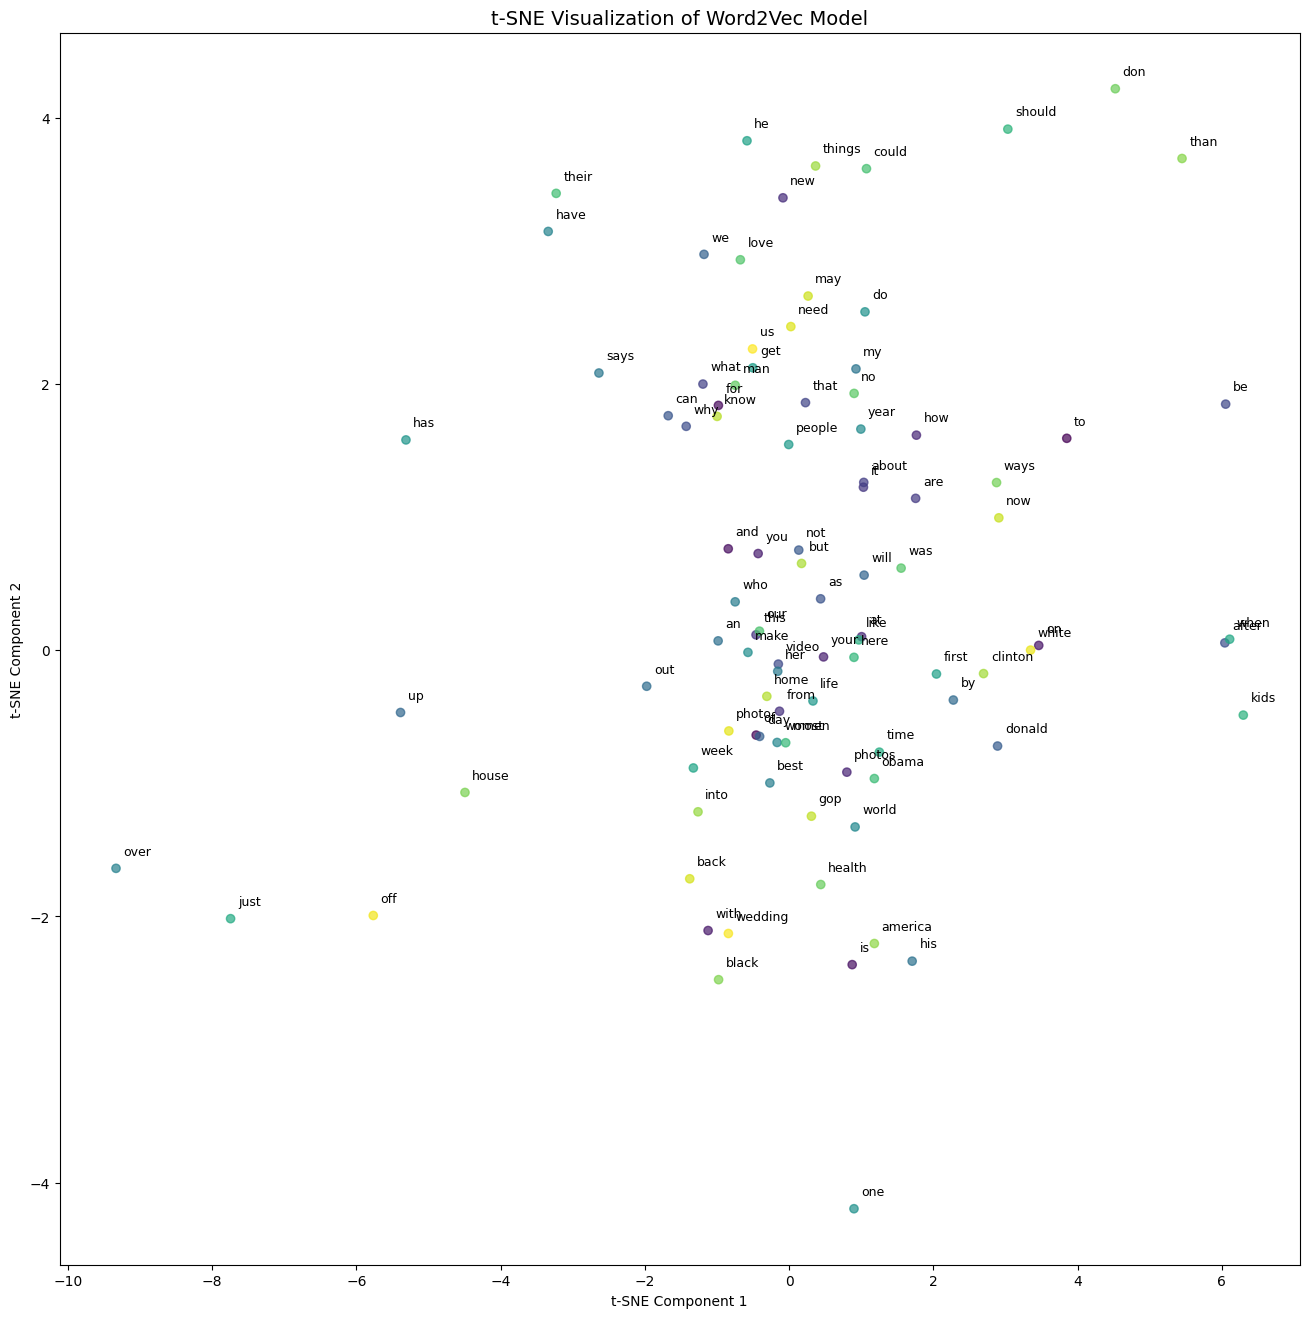

In [35]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 16))

# Limit to a subset of words (e.g., 100)
num_words = min(100, len(heading_words))
zoom_x_min, zoom_x_max = -10, 7  # Adjust these based on your cluster
zoom_y_min, zoom_y_max = -10, 7

# Filter words within the zoomed range
filtered_points = [
    (x, y, word) for x, y, word in zip(reduced_head_vectors[:, 0], reduced_head_vectors[:, 1], heading_words)
    if zoom_x_min < x < zoom_x_max and zoom_y_min < y < zoom_y_max
]

# Extract zoomed-in coordinates and words
x_coords = [p[0] for p in filtered_points]
y_coords = [p[1] for p in filtered_points]
words = [p[2] for p in filtered_points]

# Scatter plot for word vectors
plt.scatter(x_coords, y_coords, alpha=0.7, c=np.arange(len(words)), cmap="viridis")

# Add words as text annotations
for i, word in enumerate(words):  # Use 'words' from filtered_points
    plt.text(x_coords[i] + 0.1, y_coords[i] + 0.1, word, fontsize=9)

# Title and axis labels
plt.title("t-SNE Visualization of Word2Vec Model", fontsize=14)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")

plt.show()


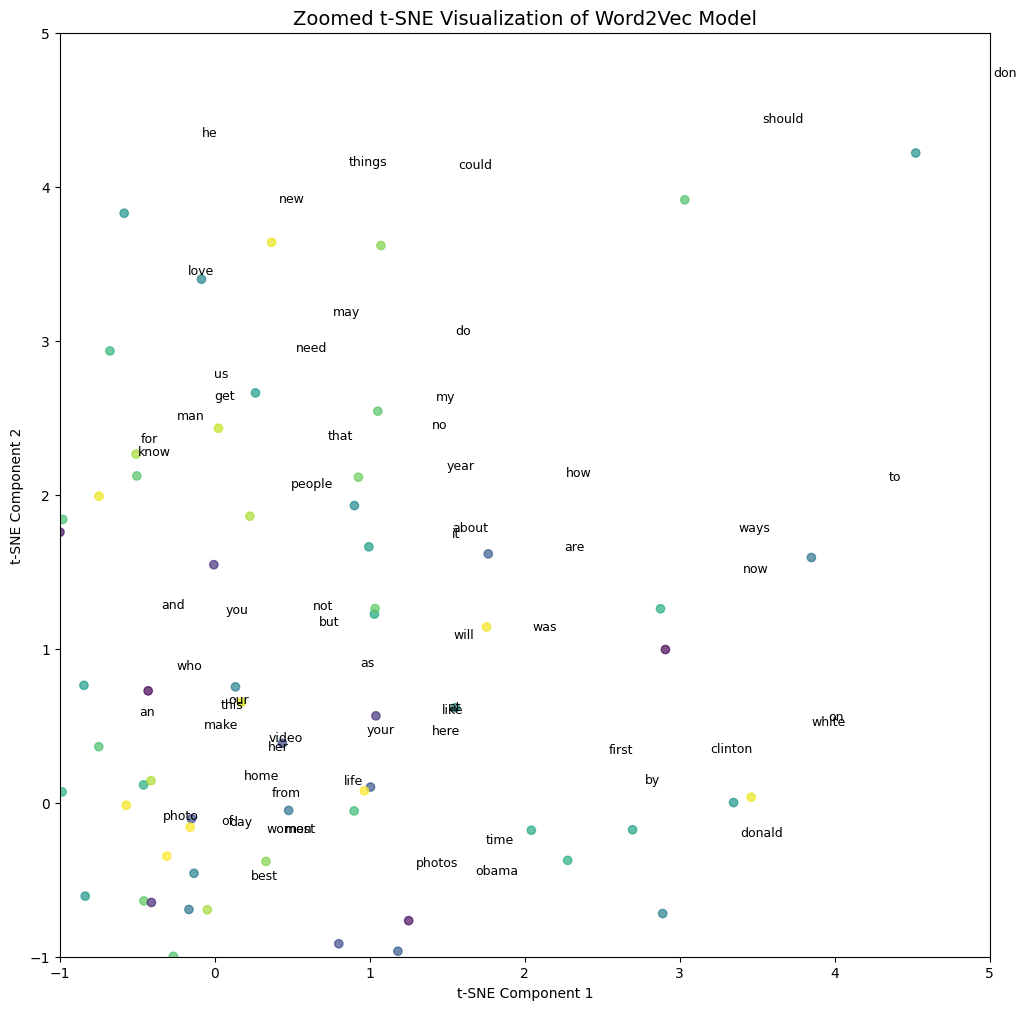

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Set figure size
plt.figure(figsize=(12, 12))

# Choose a subset of words for zooming in
zoom_x_min, zoom_x_max = -1, 5  # Adjust these based on your cluster
zoom_y_min, zoom_y_max = -1, 5

# Filter words within zoomed range
filtered_points = [
    (x, y, word) for x, y, word in zip(reduced_head_vectors[:, 0], reduced_head_vectors[:, 1], heading_words)
    if zoom_x_min < x < zoom_x_max and zoom_y_min < y < zoom_y_max
]

# Extract zoomed-in coordinates
x_coords = [p[0] for p in filtered_points]
y_coords = [p[1] for p in filtered_points]
words = [p[2] for p in filtered_points]

# Scatter plot
plt.scatter(x_coords, y_coords, alpha=0.7, c=np.random.rand(len(x_coords)), cmap="viridis")

# Annotate words
for i, word in enumerate(words):
    plt.text(x_coords[i] + 0.5, y_coords[i] + 0.5, word, fontsize=9)

# Set zoomed-in limits
plt.xlim(zoom_x_min, zoom_x_max)
plt.ylim(zoom_y_min, zoom_y_max)

# Title & labels
plt.title("Zoomed t-SNE Visualization of Word2Vec Model", fontsize=14)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")

plt.show()


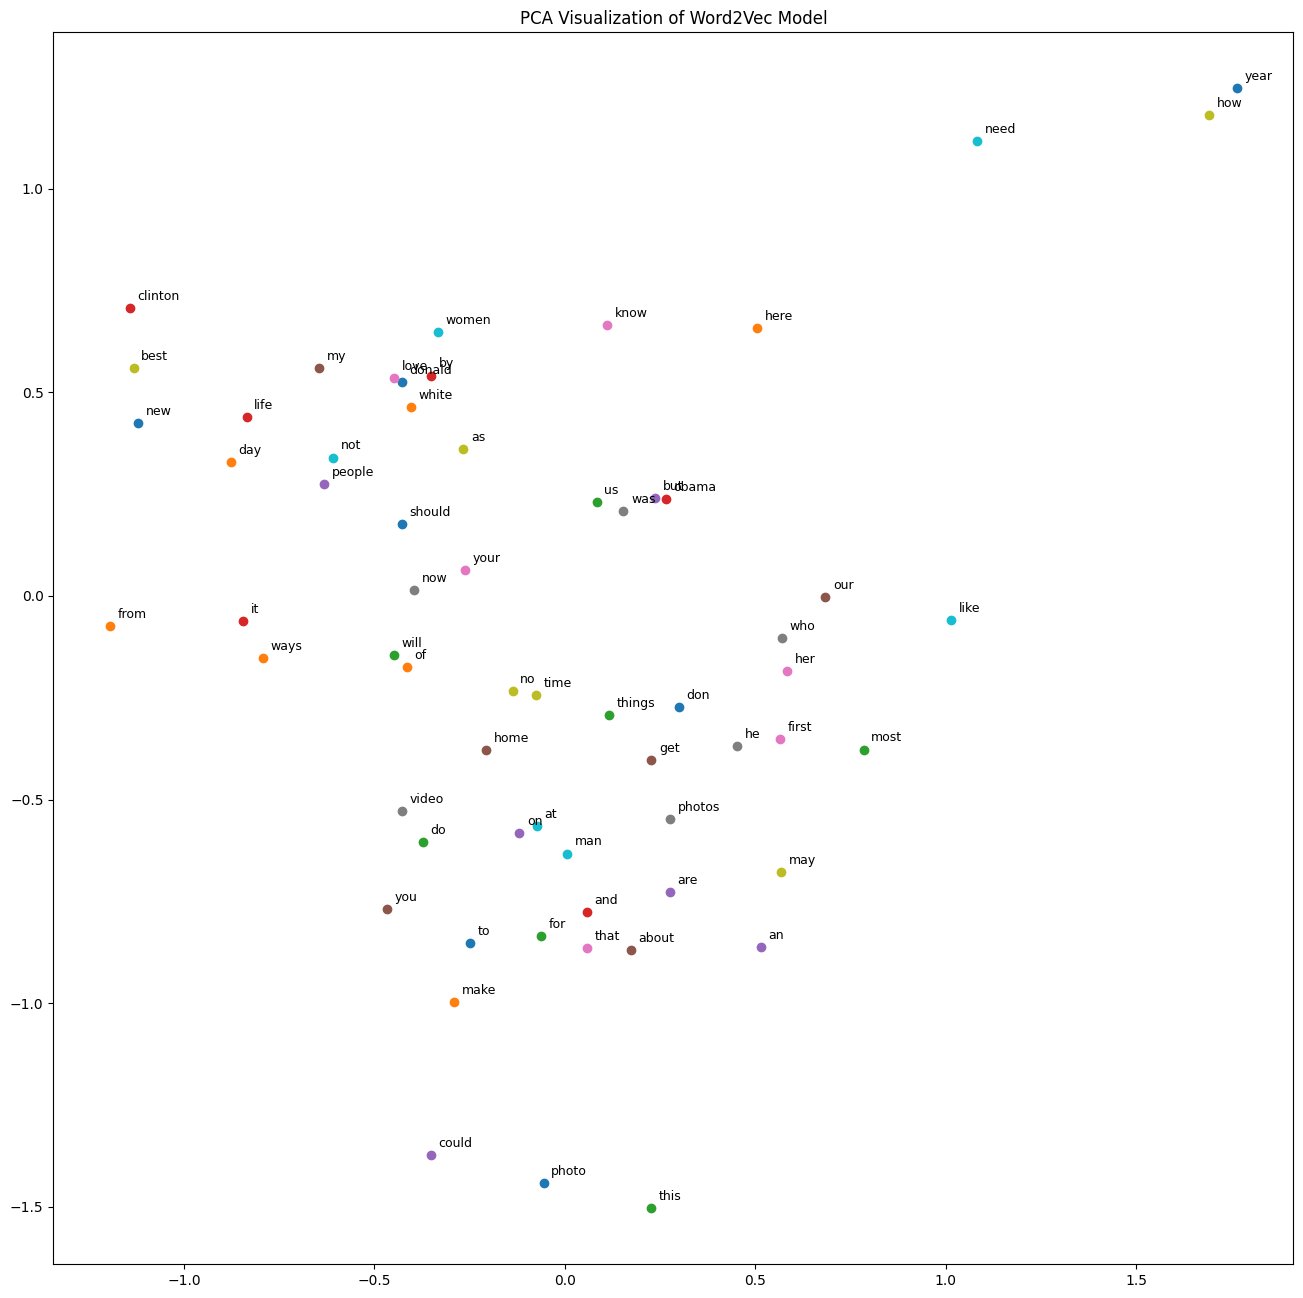

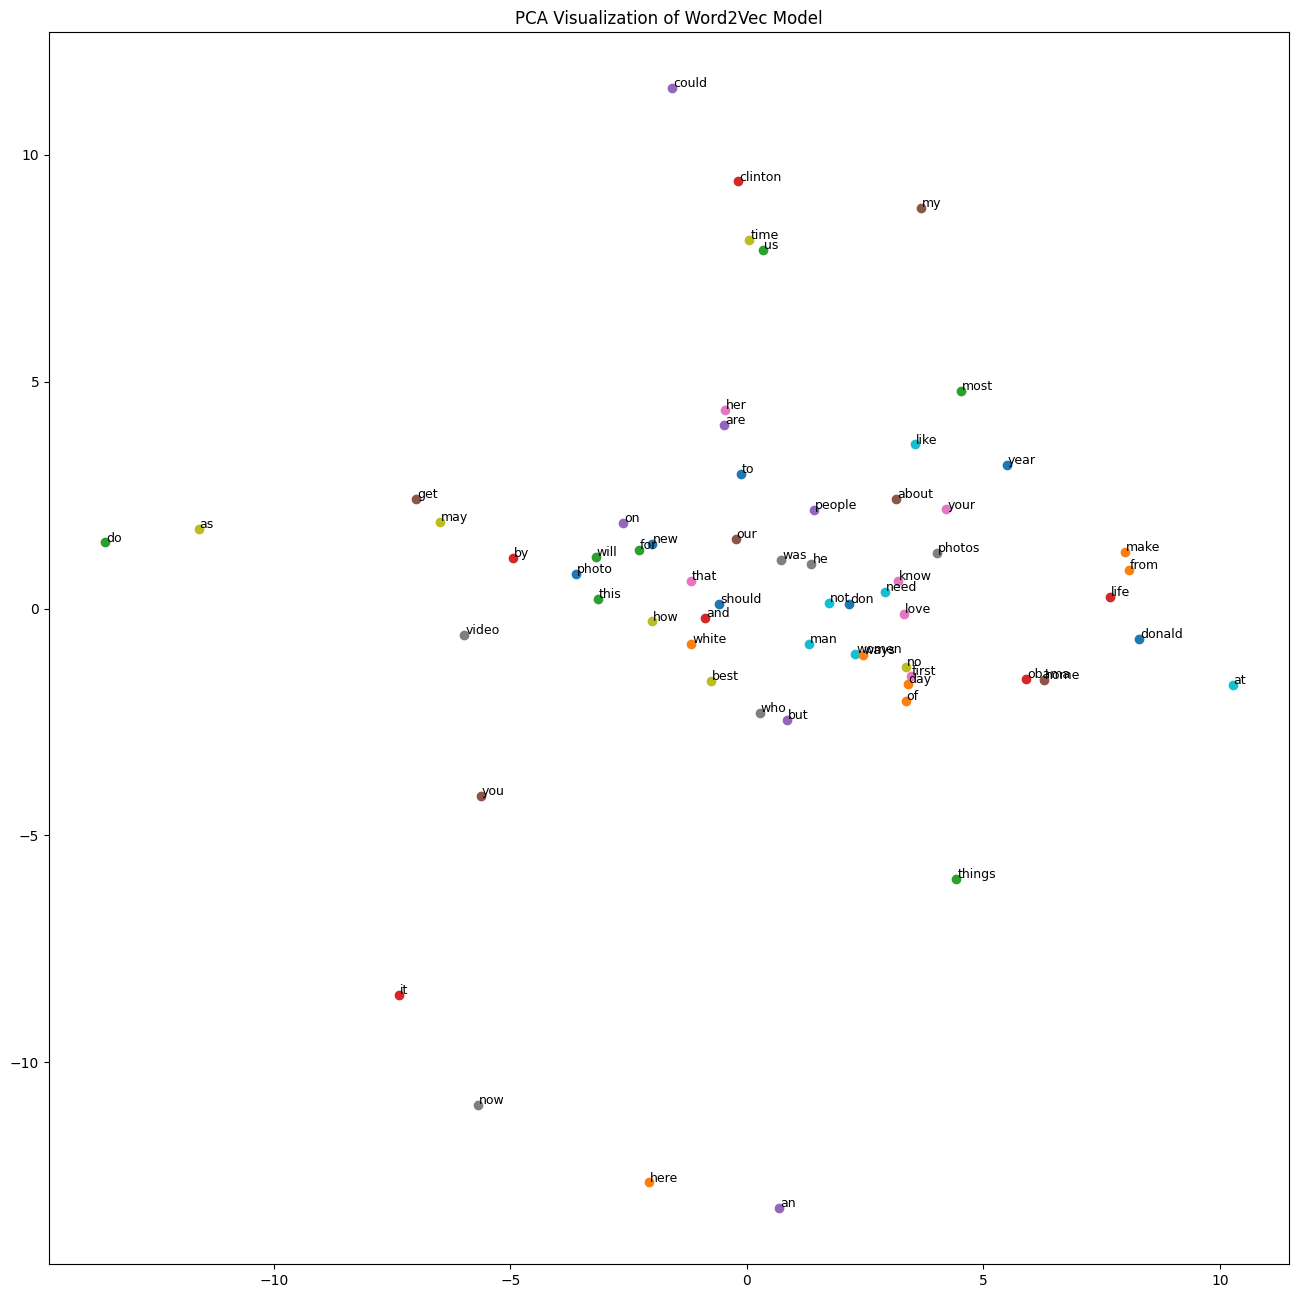

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors_head)
reduced_vectors_desc = pca.fit_transform(vectors_desc)
# Plotting
plt.figure(figsize=(16, 16))
for i, word in enumerate(words[:100]):  # Plot only the first 100 words for clarity
    x, y = reduced_vectors[i]
    plt.scatter(x, y)
    plt.text(x + 0.02, y + 0.02, word, fontsize=9)
plt.title("PCA Visualization of Word2Vec Model")
plt.show()


# Plotting
plt.figure(figsize=(16, 16))
for i, word in enumerate(words[:100]):  # Plot only the first 100 words for clarity
    x, y = reduced_vectors_desc[i]
    plt.scatter(x, y)
    plt.text(x + 0.02, y + 0.02, word, fontsize=9)
plt.title("PCA Visualization of Word2Vec Model")
plt.show()

## Evaluating the Models
We compute Spearman correlation between model similarity scores and human-annotated scores from `wordsim353crowd.csv`.

In [30]:
import pandas as pd
import gensim
from scipy import stats

# Load the evaluation dataset
df_test = pd.read_csv("/content/wordsim353crowd.csv")

# Normalize human similarity scores
df_test['Human (Mean)'] /= df_test['Human (Mean)'].max()

# Lists to store results
predictions_head = []
predictions_desc = []
gt_list = []
missed_pairs_head = 0
missed_pairs_desc = 0

# Iterate through the dataset
for _, row in df_test.iterrows():
    try:
        # Compute similarity using news_heading_model
        model_output_head = news_heading_model.wv.similarity(row['Word 1'], row['Word 2'])
        predictions_head.append(model_output_head)
    except KeyError:
        missed_pairs_head += 1

    try:
        # Compute similarity using news_shortDesc_model
        model_output_desc = news_shortDesc_model.wv.similarity(row['Word 1'], row['Word 2'])
        predictions_desc.append(model_output_desc)
    except KeyError:
        missed_pairs_desc += 1

    # Ground truth similarity scores
    gt_list.append(row['Human (Mean)'])

# Compute Spearman correlation
spearmanr_head = stats.spearmanr(predictions_head, gt_list[:len(predictions_head)])
spearmanr_desc = stats.spearmanr(predictions_desc, gt_list[:len(predictions_desc)])

# Print results
print("___** FINAL RESULTS **___\n")
print(f'Missed pairs (Headings Model): {missed_pairs_head}')
print(f'Missed pairs (Descriptions Model): {missed_pairs_desc}')
print(f'Spearmanr Score (Headings Model): {spearmanr_head.statistic}')
print(f'Spearmanr Score (Descriptions Model): {spearmanr_desc.statistic}')


___** FINAL RESULTS **___

Missed pairs (Headings Model): 36
Missed pairs (Descriptions Model): 26
Spearmanr Score (Headings Model): 0.006573589416212693
Spearmanr Score (Descriptions Model): 0.016774007253491978


In [31]:
df_test = pd.read_csv("wordsim353crowd.csv")
df_test['Human (Mean)']/=df_test['Human (Mean)'].max()
predictions = []
gt_list = []
missed_pairs = 0
for row in df_test.iterrows():
  try:
    model_output_head = news_heading_model.wv.similarity(w1=row[1]['Word 1'], w2=row[1]['Word 2'])
    model_output_desc = news_shortDesc_model.wv.similarity(w1=row[1]['Word 1'], w2=row[1]['Word 2'])
    predictions.append(model_output_head)
    gt_list.append(row[1]['Human (Mean)'])
  except:
    missed_pairs+=1
spearmanr_score = stats.spearmanr(predictions, gt_list)
print("___** FINAL RESULTS **___\n")
print(f'missed_pairs: {missed_pairs}')
print(f'spearmanr_score: {spearmanr_score.statistic}')

___** FINAL RESULTS **___

missed_pairs: 38
spearmanr_score: 0.35769851310170125
